In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA


In [19]:
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//ドキュメント//Excelr assignment Questions//Data Science//Clustering//Clustering//clustering_new.csv")


In [20]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [23]:
df.fillna(df.median(), inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [27]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[1:])
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


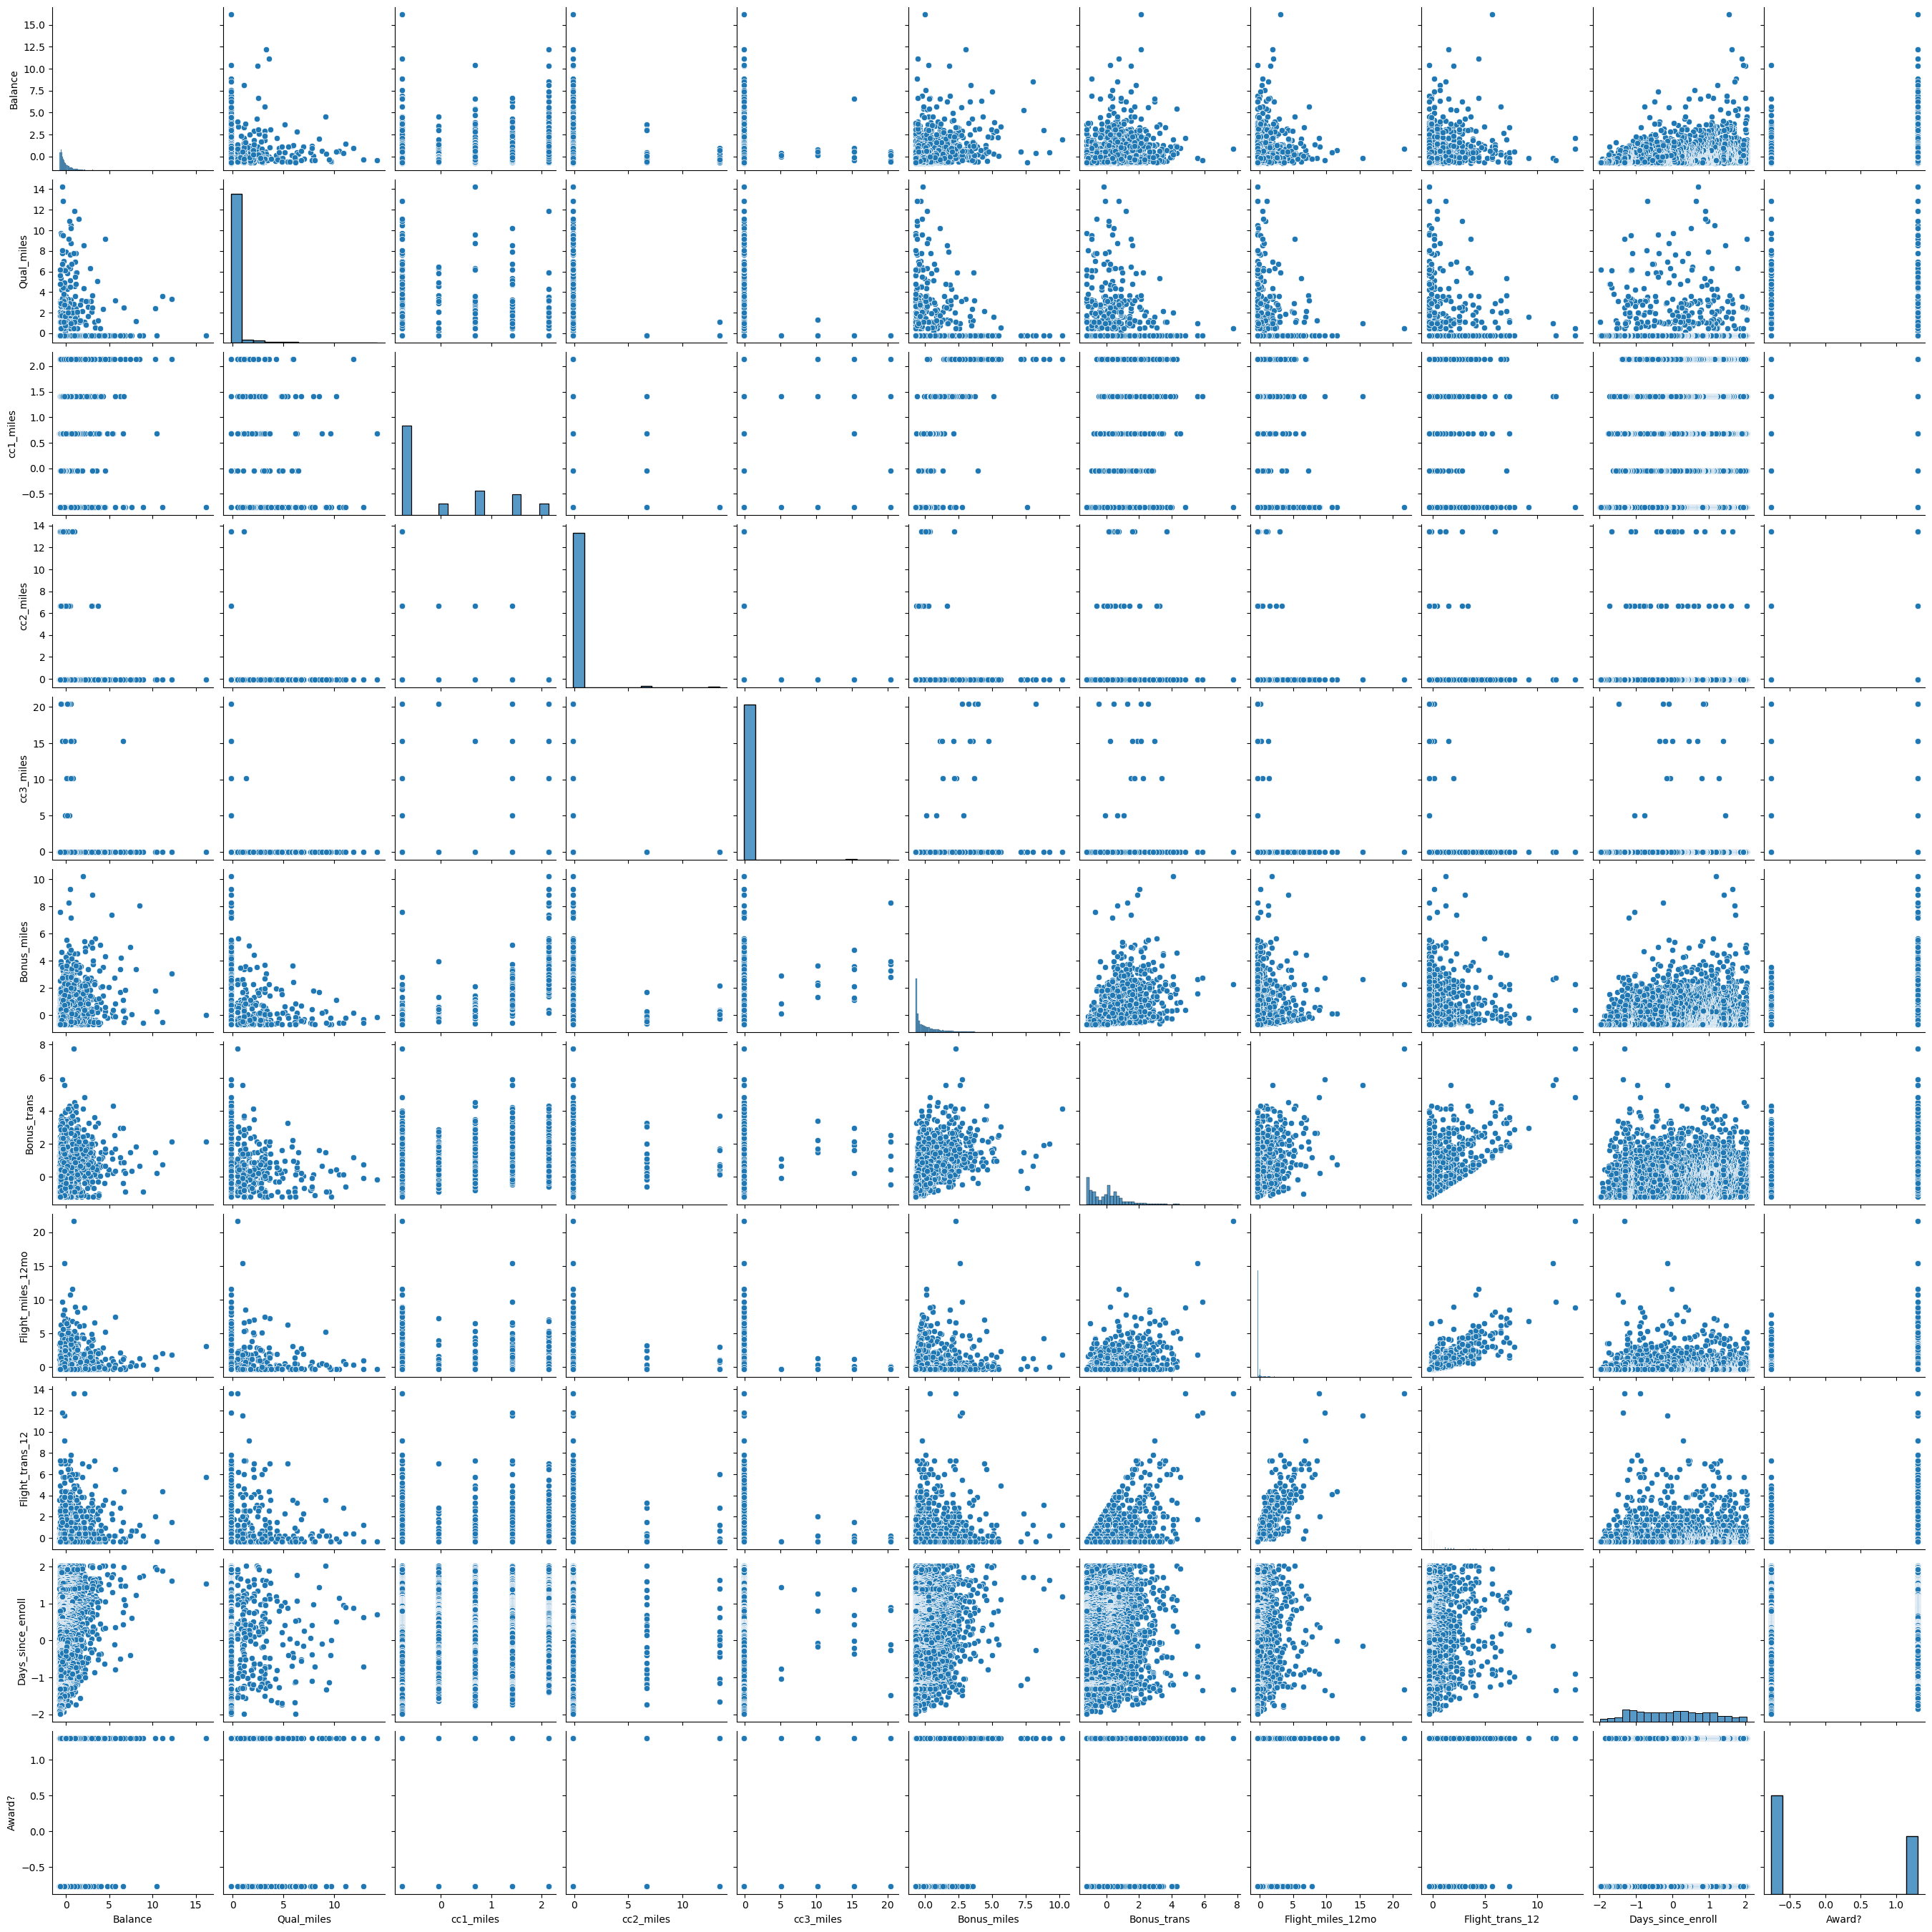

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_scaled)
plt.show()

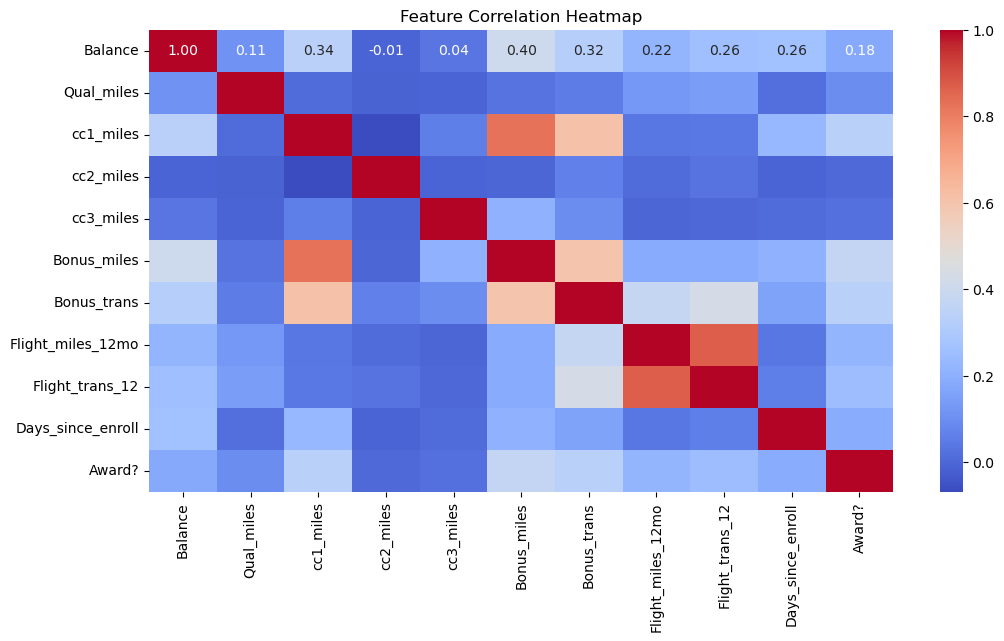

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

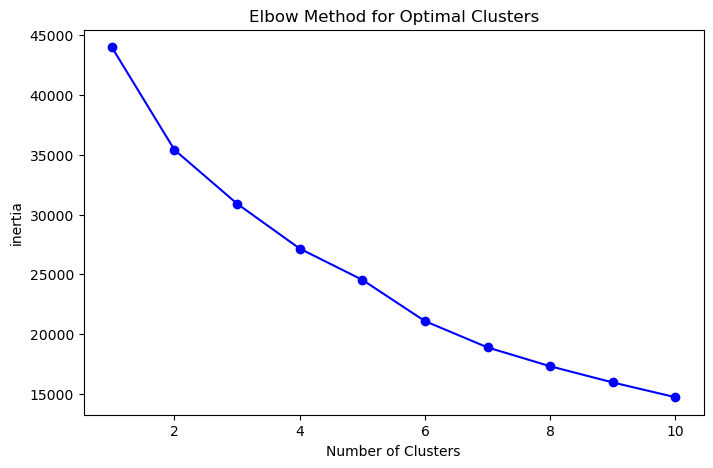

In [35]:
from sklearn.cluster import KMeans
import numpy as np

inertia = []
K= range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [37]:
optimal_k= 4
kmeans= KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df['Cluster'] = df_scaled['Cluster']
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


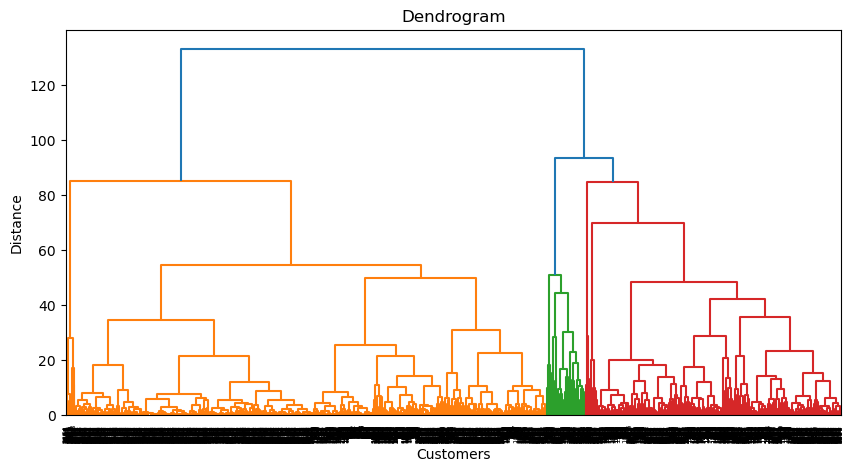

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()




In [41]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering with corrected syntax
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df_scaled["HCluster"] = hc.fit_predict(df_scaled)

# Add to the original dataset
df["HCluster"] = df_scaled["HCluster"]
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,HCluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)  # Adjust parameters as needed
df_scaled["DBCluster"] = dbscan.fit_predict(df_scaled)

# Add DBSCAN results to the original dataset
df["DBCluster"] = df_scaled["DBCluster"]
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,HCluster,DBCluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,3


                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1664.866667  138061.400000   78.800000   3.466667   1.000000   
1        2243.737318   43793.917814   97.436886   1.221785   1.019269   
2        1596.204242  116817.336214  154.756481   3.701493   1.002357   
3        1752.964286  191573.726190  775.863095   2.172619   1.035714   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         4.066667  93927.866667    28.066667         506.666667   
1         1.000393   4700.690916     6.918993         198.621707   
2         1.001571  39216.199529    18.759623         334.355852   
3         1.000000  31412.160714    26.779762        5365.672619   

         Flight_trans_12  Days_since_enroll    Award?  HCluster  DBCluster  
Cluster                                                                    

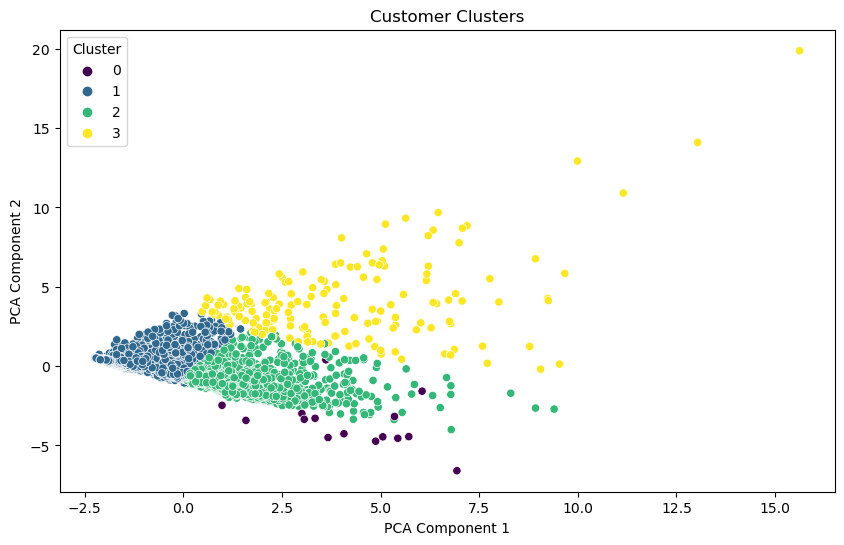

In [43]:
# Calculate cluster means for each group
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

# Plot Clusters using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.iloc[:, :-3])  # Exclude clustering labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters")
plt.show()
